In [2]:
from cv2 import imread
import cv2
import numpy as np
import requests
import json
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import cm
from datetime import datetime


### Helper Functions

In [3]:
def print_json(d, m):
    for k in d.keys():
        if isinstance(d[k],dict):
            print("\t"*m, k)
            print_json(d[k],m+1)
        else:
            if isinstance(d[k],list):
                print("\t"*m, k, "-->", type(d[k]),"\t",np.array(d[k]).shape,"\n")
            else:
                print("\t"*m, k, "-->", type(d[k]),"\n")
                

def weight_normalize(arg,max_val=1.0):
    arg_max = np.max(arg)
    arg_min = np.abs(np.min(arg))
    if arg_max>arg_min:
        return (arg/arg_max)*max_val
    elif arg_min>0:
        return (arg/arg_min)*max_val
    else:
        return arg

### Data

In [4]:
img = imread('trials/test3.png',0)
img = np.invert(img)
img = cv2.resize(img,(28,28))
x = img.reshape(28,28,1)
x = x.astype('float32')
x /= 255
print ("Shape of input data:", x.shape)
x = np.array(x).tolist()

Shape of input data: (28, 28, 1)


### API Request

In [8]:
url = "https://xai.arya.ai/api/v1/explainability"
payload = json.dumps({
  "data": x,
  "is_multi_input": False,
  "mode": "default",
  "token": "1629876952391",
  "scaler": 1.0,
  "predictions": True
})
headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

### API Response

In [9]:
output = response.json()

In [10]:
print_json(output,0)    

 success --> <class 'bool'> 

 data
	 conv2d_1_input --> <class 'list'> 	 (28, 28, 1) 

 network_output
	 dense_2/Softmax:0 --> <class 'list'> 	 (1, 10) 



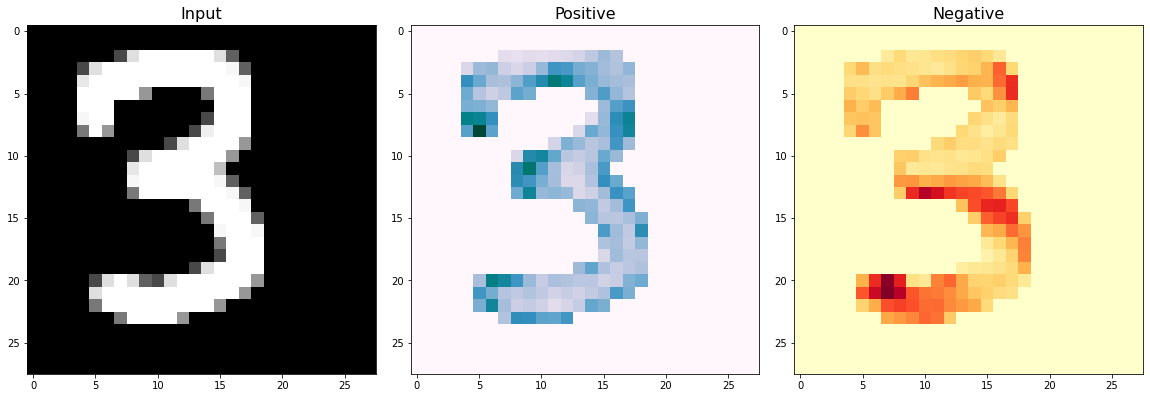

In [11]:
k = list(output["data"].keys())[0]
if "positive" in output["data"][k]:
    fig = plt.figure(figsize=(20,20))
    gs = fig.add_gridspec(1, 3, hspace=0.1, wspace=0.1)
    axs = gs.subplots()
    axs[0].imshow(img,cmap='gray')
    axs[0].set_title("Input",fontsize=16)
    axs[1].imshow(weight_normalize(output["data"][k]["positive"]),cmap='PuBuGn')
    axs[1].set_title("Positive",fontsize=16)
    axs[2].imshow(weight_normalize(output["data"][k]["negative"]),cmap='YlOrRd')
    axs[2].set_title("Negative",fontsize=16)
    plt.show()
else:
    fig = plt.figure(figsize=(20,20))
    gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0.1)
    axs = gs.subplots()
    axs[0].imshow(img,cmap='gray')
    axs[0].set_title("Input",fontsize=16)
    axs[1].imshow(weight_normalize(output["data"][k]),cmap='inferno')
    axs[1].set_title("Default",fontsize=16)
    plt.show()